# Student_Marks

## From this dataset we will find out the Students Performance based on Subjects we will  calculate Percentage, Grades, after calculating this we will find out whose Pass or Fail


### let's get started with connecting mysql server with this notebook

In [1]:
import mysql.connector
con = mysql.connector.connect(
      host="localhost",
      port=3306,
      user="root",
      password="saymyname007",
      database="student_marks")

let's import some important libraries for reading & visualization of data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Dataset from mysql calling table name studmarks

In [3]:
df = pd.read_sql_query("Select* from studmarks",con)
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55.0,45.0,56.0,87.0,21.0,52.0,89.0,65.0
1,Suresh,M,04-05-1987,75.0,96.0,78.0,64.0,90.0,61.0,58.0,2.0
2,Ramesh,M,25-05-1989,25.0,54.0,89.0,76.0,95.0,87.0,56.0,74.0
3,Jessica,F,12-08-1990,78.0,96.0,86.0,63.0,54.0,89.0,75.0,45.0
4,Jennifer,F,02-09-1989,58.0,96.0,78.0,46.0,96.0,77.0,83.0,53.0
5,Annu,F,05-04-1988,45.0,87.0,52.0,89.0,55.0,89.0,87.0,52.0
6,pooja,F,04-05-1987,55.0,64.0,61.0,58.0,75.0,58.0,64.0,61.0
7,Ritesh,M,25-05-1989,54.0,76.0,87.0,56.0,25.0,56.0,76.0,87.0
8,Farha,F,12-08-1990,55.0,63.0,89.0,75.0,78.0,75.0,63.0,89.0
9,Mukesh,M,02-09-1989,96.0,46.0,77.0,83.0,58.0,83.0,46.0,77.0


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       10 non-null     object 
 1   Gender     10 non-null     object 
 2   DOB        10 non-null     object 
 3   Maths      10 non-null     float64
 4   Physics    10 non-null     float64
 5   Chemistry  10 non-null     float64
 6   English    10 non-null     float64
 7   Biology    10 non-null     float64
 8   Economics  10 non-null     float64
 9   History    10 non-null     float64
 10  Civics     10 non-null     float64
dtypes: float64(8), object(3)
memory usage: 1008.0+ bytes


In [5]:
# calculating rows & columns
df.shape

(10, 11)

In [6]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [7]:
df["Gender"].value_counts()

M    5
F    5
Name: Gender, dtype: int64

5 boys & 5 girls

In [8]:
# Checking for NUll values
df.isnull().sum().to_frame()

,0
Name,0
Gender,0
DOB,0
Maths,0
Physics,0
Chemistry,0
English,0
Biology,0
Economics,0
History,0


let's check the total marks, studetns got in subjects

In [41]:

df["Total_Marks"]= df["Maths"]+df["Physics"]+df["Chemistry"]+df["English"]+df["Biology"]+df["Economics"]+df["History"]+df["Civics"]
df["Total_Marks"]

0    470.0
1    524.0
2    556.0
3    586.0
4    587.0
5    556.0
6    496.0
7    517.0
8    587.0
9    566.0
Name: Total_Marks, dtype: float64

Now, we will check who is Pass or Fail subject wise

In [10]:
#defining passing marks for each subject
passing_marks = 33

In [11]:
df["Result_Maths"]=np.where(df["Maths"]<passing_marks, "Fail", "Pass")
df.Result_Maths.value_counts()

Pass    9
Fail    1
Name: Result_Maths, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

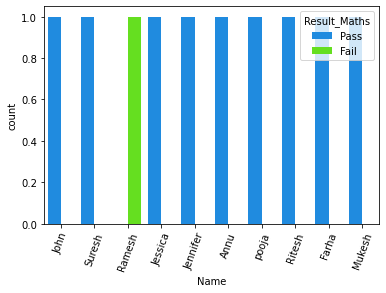

In [12]:
sns1=sns.countplot(x="Name",data=df,hue="Result_Maths", palette="gist_rainbow_r")
sns1
plt.xticks(rotation=70)

Ramesh is Fail in Maths

In [13]:
df["Result_Physics"] = np.where(df["Physics"]<passing_marks,"Fail","Pass")
df.Result_Physics.value_counts()

Pass    10
Name: Result_Physics, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

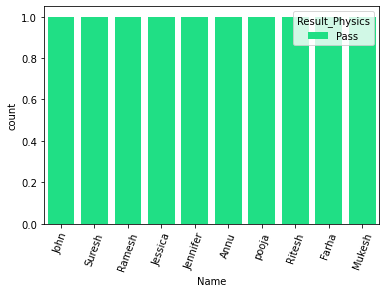

In [14]:
sns2=sns.countplot(x="Name", data=df, hue="Result_Physics", palette="gist_rainbow_r")
sns2
plt.xticks(rotation=70)

All Students are pass in Physics

In [15]:
df["Result_Chemistry"] = np.where(df["Chemistry"]<passing_marks,"Fail","Pass")
df.Result_Chemistry.value_counts()

Pass    10
Name: Result_Chemistry, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

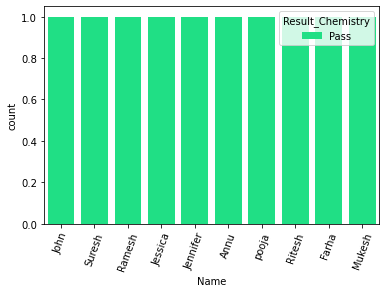

In [16]:
sns3=sns.countplot(x="Name",data=df,hue="Result_Chemistry", palette="gist_rainbow_r")
sns3
plt.xticks(rotation=70)

All students are pass in Chemistry

In [17]:
df["Result_English"] = np.where(df["English"]<passing_marks,"Fail","Pass")
df.Result_English.value_counts()

Pass    10
Name: Result_English, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

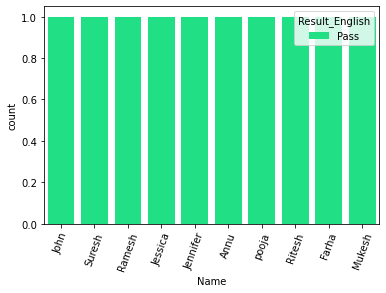

In [18]:
sns4=sns.countplot(x="Name",data=df,hue="Result_English", palette="gist_rainbow_r")
sns4
plt.xticks(rotation=70)

In [19]:
df["Result_Biology"] = np.where(df["Biology"]<passing_marks,"Fail","Pass")
df.Result_Biology.value_counts()

Pass    8
Fail    2
Name: Result_Biology, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

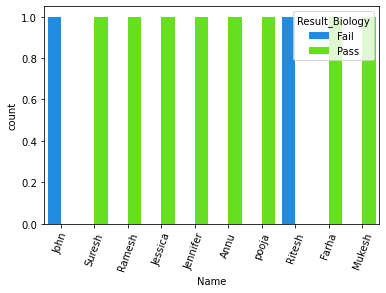

In [20]:
sns5=sns.countplot(x="Name",data=df,hue="Result_Biology", palette="gist_rainbow_r")
sns5
plt.xticks(rotation=70)

John & Ritesh are Fail in Biology

In [21]:
df["Result_Economics"] = np.where(df["Economics"]<passing_marks, "Fail","Pass")
df.Result_Economics.value_counts()

Pass    10
Name: Result_Economics, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

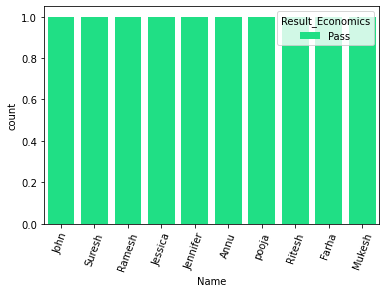

In [22]:
sns6=sns.countplot(x="Name",data=df,hue="Result_Economics", palette="gist_rainbow_r")
sns6
plt.xticks(rotation=70)

All Students are pass in Economics

In [23]:
df["Result_History"] = np.where(df["History"]<passing_marks, "Fail","Pass")
df.Result_History.value_counts()

Pass    10
Name: Result_History, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

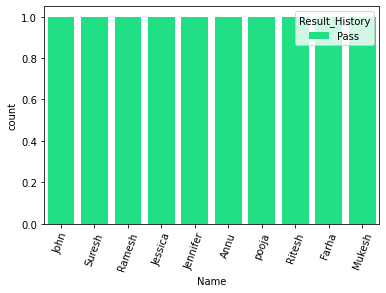

In [24]:
sns7=sns.countplot(x="Name", data=df, hue="Result_History", palette="gist_rainbow_r")
sns7
plt.xticks(rotation=70)

All Students are pass in History

In [25]:
df["Result_Civics"] = np.where(df["Civics"]<passing_marks, "Fail","Pass")
df.Result_Civics.value_counts()

Pass    9
Fail    1
Name: Result_Civics, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

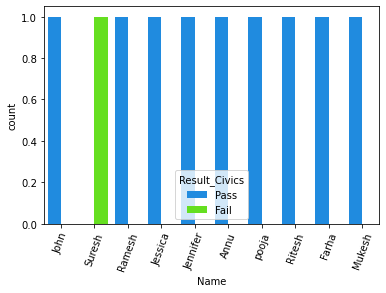

In [26]:
sns8=sns.countplot(x="Name", data=df, hue="Result_Civics", palette="gist_rainbow_r")
sns8
plt.xticks(rotation=70)

Suresh is Fail in Civics

In [27]:
df["Final_Result"] = df.apply(lambda x:"Fail" if x["Result_Maths"] == "Fail"  or
                                    x["Result_Physics"] == "Fail"  or
                                    x["Result_Chemistry"] == "Fail"  or
                                    x["Result_English"] == "Fail"  or
                                    x["Result_Biology"] == "Fail"  or
                                    x["Result_Economics"] == "Fail"  or
                                    x["Result_History"] == "Fail"  or
                                    x["Result_Civics"] == "Fail"
                                    
                                    else "Pass",axis=1)
df.Final_Result.value_counts()

Pass    6
Fail    4
Name: Final_Result, dtype: int64

Clearly we can see that 4 students are fail

In [28]:
df["Final_Result"]

0    Fail
1    Fail
2    Fail
3    Pass
4    Pass
5    Pass
6    Pass
7    Fail
8    Pass
9    Pass
Name: Final_Result, dtype: object

we can see from index numbers who is pass or fail

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

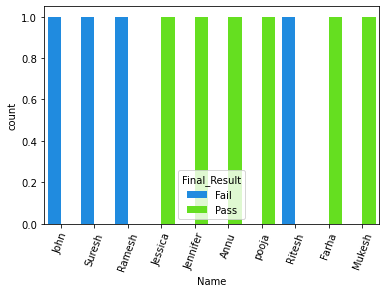

In [29]:
sns.countplot(x="Name",data=df,hue="Final_Result", palette="gist_rainbow_r")
plt.xticks(rotation=70)

John, Suresh, Ramesh, Ritesh are Fails in exams

calculate Percentage

In [30]:
df["Percentage"]= df["Total_Marks"]/8
df["Percentage"]

0    58.750
1    65.500
2    69.500
3    73.250
4    73.375
5    69.500
6    62.000
7    64.625
8    73.375
9    70.750
Name: Percentage, dtype: float64

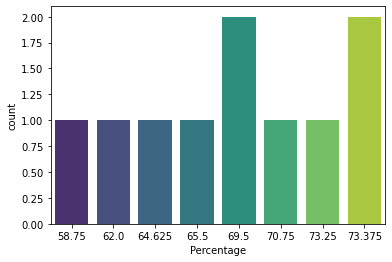

In [31]:
sns.countplot(x="Percentage", data=df, palette="viridis")

C:\Users\Deepak vyas\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

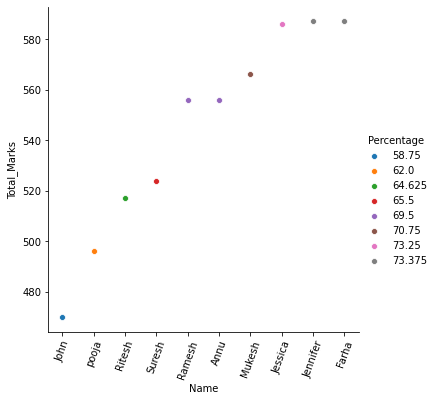

In [32]:
sns.pairplot(data=df, x_vars="Name", y_vars="Total_Marks", hue="Percentage", size=5)
plt.xticks(rotation=70)

Jennifer & Farha are almost same with 73 percentage,
john is last with 58 percentage

Now see the Students performance by Grades

In [33]:
def GetGrade(Percentage, Final_Result):
    if( Final_Result == "Fail"):
        return "F"
    if( Percentage >= 80):
        return "A"
    if( Percentage >= 70):
        return "B"
    if( Percentage >=60):
        return "C"
    if( Percentage >=50):
        return "D"
    if( Percentage >=40):
        return "E"
    else:
        return "F"

In [34]:
df["Grade"] = df.apply(lambda x : GetGrade(x["Percentage"], x["Final_Result"]),axis=1)
df.Grade.value_counts()

F    4
B    4
C    2
Name: Grade, dtype: int64

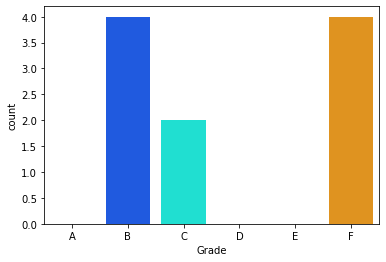

In [35]:
sns.countplot(x="Grade", data=df, order=["A","B","C","D","E","F"], palette="gist_rainbow_r")
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

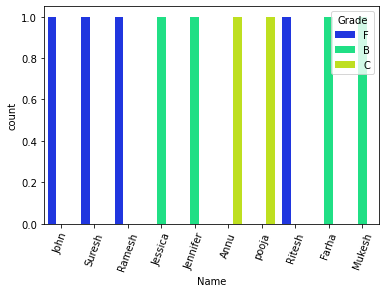

In [36]:
sns.countplot(x="Name", data=df, hue="Grade", palette="gist_rainbow_r")
plt.xticks(rotation=70)

In [43]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,...,Result_Physics,Result_Chemistry,Result_English,Result_Biology,Result_Economics,Result_History,Result_Civics,Final_Result,Percentage,Grade
0,John,M,05-04-1988,55.0,45.0,56.0,87.0,21.0,52.0,89.0,...,Pass,Pass,Pass,Fail,Pass,Pass,Pass,Fail,58.750,F
1,Suresh,M,04-05-1987,75.0,96.0,78.0,64.0,90.0,61.0,58.0,...,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,65.500,F
2,Ramesh,M,25-05-1989,25.0,54.0,89.0,76.0,95.0,87.0,56.0,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,69.500,F
3,Jessica,F,12-08-1990,78.0,96.0,86.0,63.0,54.0,89.0,75.0,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,73.250,B
4,Jennifer,F,02-09-1989,58.0,96.0,78.0,46.0,96.0,77.0,83.0,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,73.375,B
5,Annu,F,05-04-1988,45.0,87.0,52.0,89.0,55.0,89.0,87.0,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,69.500,C
6,pooja,F,04-05-1987,55.0,64.0,61.0,58.0,75.0,58.0,64.0,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,62.000,C
7,Ritesh,M,25-05-1989,54.0,76.0,87.0,56.0,25.0,56.0,76.0,...,Pass,Pass,Pass,Fail,Pass,Pass,Pass,Fail,64.625,F
8,Farha,F,12-08-1990,55.0,63.0,89.0,75.0,78.0,75.0,63.0,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,73.375,B
9,Mukesh,M,02-09-1989,96.0,46.0,77.0,83.0,58.0,83.0,46.0,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,70.750,B


# Saving Model/File with the help of Pickle

In [38]:
import pickle

In [39]:
with open ("df_pickle","wb") as studmarks:
    pickle.dump(df,studmarks)

## Conclusion:
    
##### Topper of the class is acutally tie between Jennifer & Farah with 73.375, last in class is John & 4 students are fail in exams, need to more study for next year